# Getting Started

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cleanlab/cleanvision/blob/main/examples/demo.ipynb) 

In [ ]:
!pip install -U pip
!pip install git+https://github.com/cleanlab/cleanvision.git

**After you install these packages, you may need to restart your notebook runtime before running the rest of this notebook.**

## What is CleanVision?
**CleanVision** is built to automatically detects various issues in image datasets, such as images that are: (near) duplicates, blurry, over/under-exposed, etc. This data-centric AI package is designed as a quick first step for any computer vision project to find problems in your dataset, which you may want to address before applying machine learning.


|     | Issue Type      | Description                                                                                  | Issue Key        |
|-----|------------------|----------------------------------------------------------------------------------------------|------------------|
| 1   | Light            | Images that are too bright/washed out in the dataset                                         | light            |
| 2   | Dark             | Images that are irregularly dark                                                             | dark             |
| 3   | Odd Aspect Ratio | Images with an unusual aspect ratio (i.e. overly skinny/wide)                                                       | odd_aspect_ratio |
| 4   | Exact Duplicates | Images that are exact duplicates of each other                          | exact_duplicates |
| 5   | Near Duplicates  | Images that are almost visually identical to each other (e.g. same image with different filters)                                 | near_duplicates  |
| 6   | Blurry           | Images that are blurry or out of focus                                                  | blurry           |
| 7   | Grayscale        | Images that are grayscale (lacking color)                                                            | grayscale        |
| 8   | Low Information  | Images that lack much information (e.g. a completely black image with a few white dots) | low_information  |

The Issue Key column specifies the name for each type of issue in the CleanVision code. In the examples, it is shown how one can use these keys to detect particular issue types and specify custom hyperparameters.

This notebook uses an example dataset, that you can download from here.

In [ ]:
!wget - nc 'https://cleanlab-public.s3.amazonaws.com/CleanVision/image_files.zip'

In [3]:
!unzip -q image_files.zip

## Examples

### Using CleanVision to detect default issue types

Reading images from /Users/sanjana/cleanlab_home/cleanvision-examples/image_files


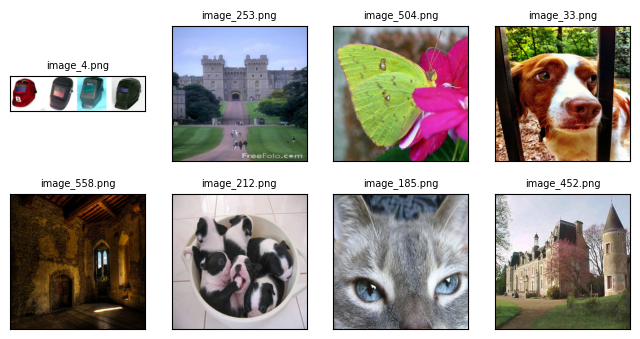

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 595/595 [00:03<00:00, 194.28it/s]

Issue checks completed. To see a detailed report of issues found, use imagelab.report().


In [4]:
from cleanvision.imagelab import Imagelab

# Path to your dataset, you can specify your own dataset path
dataset_path = "./image_files/"

# Initialize imagelab with your dataset
imagelab = Imagelab(data_path=dataset_path)

# Visualize a few images from the dataset
imagelab.visualize(num_images=8)

# Find issues
imagelab.find_issues()

The `report()` method helps you quickly understand the major issues detected in the dataset. It reports the number of images in the dataset that exhibit each type of issue, and shows example images corresponding to most the severe instances of each issue.

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | grayscale        |           20 |
|  1 | near_duplicates  |           20 |
|  2 | exact_duplicates |           19 |
|  3 | dark             |           13 |
|  4 | blurry           |           10 |
|  5 | odd_aspect_ratio |            8 |
|  6 | light            |            5 |
|  7 | low_information  |            4 | 


Top 4 examples with grayscale issue in the dataset.


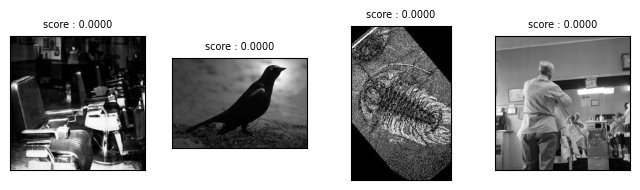


Top 4 sets of images with near_duplicates issue
Set: 0


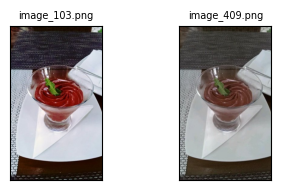

Set: 1


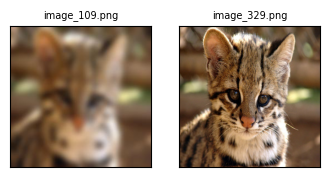

Set: 2


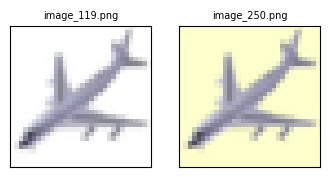

Set: 3


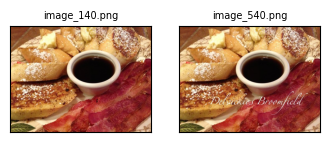


Top 4 sets of images with exact_duplicates issue
Set: 0


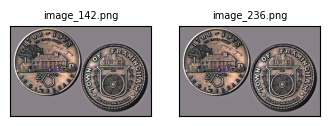

Set: 1


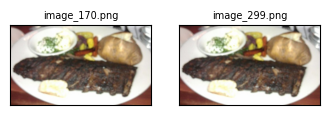

Set: 2


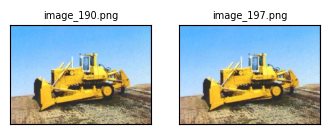

Set: 3


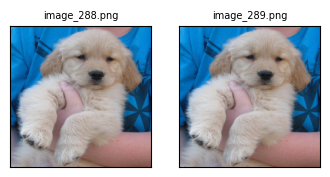


Top 4 examples with dark issue in the dataset.


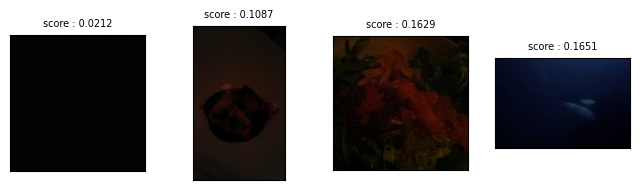


Top 4 examples with blurry issue in the dataset.


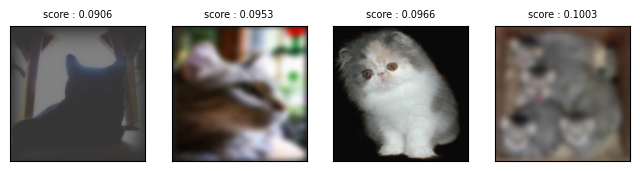


Top 4 examples with odd_aspect_ratio issue in the dataset.


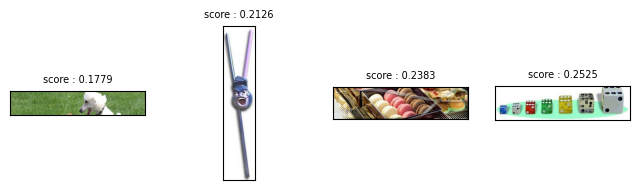


Top 4 examples with light issue in the dataset.


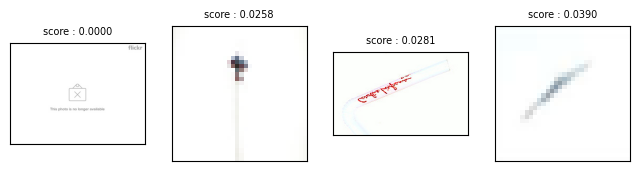


Top 4 examples with low_information issue in the dataset.


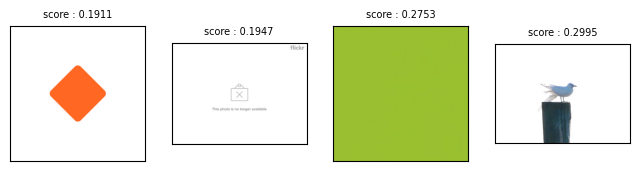

In [5]:
imagelab.report()

The main way to interface with your data is via the `Imagelab` class. This class can be used to understand the issues in your dataset at a high level (global overview) and low level (issues and quality scores for each image) as well as additional information about the dataset. It has three main attributes:
- `Imagelab.issue_summary`
- `Imagelab.issues`
- `Imagelab.info`

#### imagelab.issue_summary
Dataframe with global summary of all issue types detected in your dataset and the overall prevalence of each type.

In each row:\
`issue_type` - name of the issue\
`num_images` - number of images of that issue type found in the dataset

In [6]:
imagelab.issue_summary

issue_type num_images
0         grayscale         20
1   near_duplicates         20
2  exact_duplicates         19
3              dark         13
4            blurry         10
5  odd_aspect_ratio          8
6             light          5
7   low_information          4

#### imagelab.issues

DataFrame assessing each image in your dataset, reporting which issues this image exhibits and a quality score for each type of issue. There is a Boolean column for each issue type, showing whether each image exhibits that type of issue or not. For example,  the rows where the `is_dark_issue` column contains `True` entries correspond to those images that appear too **dark**. For this issue type (and more generally each other type of issue), there is a numeric column `dark_score`, which assess how severe this issue is in each image. These quality scores lie between 0 and 1, where lower values indicate more severe instances of the issue (images which are more dark in this example).  One use-case for `imagelab.issues` is to filter out all images exhibiting  one particular type of issue and rank them by their quality score.

Get all images with `is_blurry_issue=True`

In [7]:
blurry_images = imagelab.issues[imagelab.issues["is_blurry_issue"] == True].sort_values(by=['blurry_score']).index.tolist()
blurry_images

['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_524.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_218.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_312.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_53.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_109.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_304.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_453.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_26.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_131.png',
 '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_501.png']

Visualize the blurry images

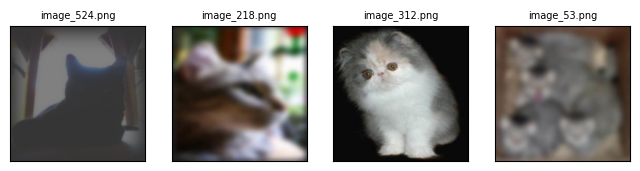

In [8]:
imagelab.visualize(image_files=blurry_images[:4])

You can also specify an issue type in `imagelab.visualize()`. It will show images in order of the severity of that issue in the image.


Top 4 examples with blurry issue in the dataset.


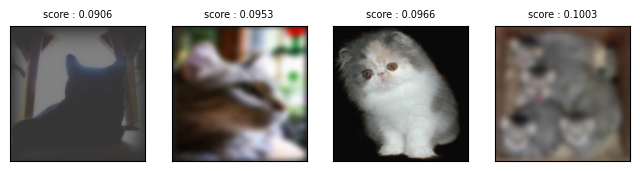

In [9]:
imagelab.visualize(issue_types=['blurry'])

#### imagelab.info

This is a nested dictionary containing statistics about the images and other miscellaneous information stored while checking for issues in the dataset. Beware: this dictionary may be large and poorly organized (it is only intended for advanced users).

In [10]:
# Possible keys: statistics, issue names
print(list(imagelab.info.keys()))

['statistics', 'dark', 'light', 'odd_aspect_ratio', 'low_information', 'blurry', 'grayscale', 'exact_duplicates', 'near_duplicates']


In [11]:
# statistics collected, you can further look into these by checking their values
print(list(imagelab.info["statistics"].keys()))
imagelab.info['statistics']['brightness']

['brightness', 'aspect_ratio', 'entropy', 'blurriness', 'color_space']


/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_0.png      0.675990
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_1.png      0.392628
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_10.png     0.223515
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_100.png    0.487965
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_101.png    0.365540
                                                                                 ...   
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_95.png     0.750118
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_96.png     0.359054
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_97.png     0.315092
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_98.png     0.368421
/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_99.png     0.571404
Name: brightness, Length: 595, d

#### Duplicate sets
`imagelab.info` can also be used to see which images are near or exact  duplicates of each other. 

`issue.summary` shows the number of exact duplicate images but does not show how many such sets of duplicates images exist in the dataset. To see the number of exact duplicate sets, you can use `imagelab.info`

In [12]:
imagelab.info['exact_duplicates']['num_sets']

9

You can also get the sets of image files for each duplicated set using `imagelab.info`

In [13]:
# This is a list of list, where each nested list is a set of exact duplicate images.
# Similarly, you can also retrieve near duplicate sets.
imagelab.info['exact_duplicates']['sets']

[['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_142.png',
  '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_236.png'],
 ['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_170.png',
  '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_299.png'],
 ['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_190.png',
  '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_197.png'],
 ['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_288.png',
  '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_289.png'],
 ['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_292.png',
  '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_348.png',
  '/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_492.png'],
 ['/Users/sanjana/cleanlab_home/cleanvision-examples/image_files/image_30.png',
  '/Users/sanjana/cleanl

**The rest of this notebook demonstrates more advanced/customized workflows you can do with CleanVision.**

### Using CleanVision to detect specific issues

It might be the case that only a few issue types are relevant for your dataset and you don't want to run it through all checks to save time. You can do so by specifying `issue_types` as an argument.

`issue_types` is a dict, where keys are the issue types that you want to detect and values are dict which contains hyperparameters. This example uses default hyperparameters, in which case you can leave the hyperparameter dict empty. To find keys for issue types check the above table that lists all issue types supported by CleanVision. 

Reading images from /Users/sanjana/cleanlab_home/cleanvision-examples/image_files
Checking for dark images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 595/595 [00:03<00:00, 149.31it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | dark         |           13 | 


Top 4 examples with dark issue in the dataset.


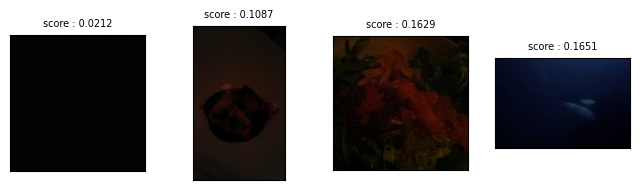

In [14]:
# Initialize imagelab with your dataset
imagelab = Imagelab(data_path=dataset_path)

# specify issue types to detect
issue_types = {"dark": {}}

# Find issues
imagelab.find_issues(issue_types)

# Show a report of the issues found
imagelab.report()

### Check for additional types of issues using the same instance

Suppose you also want to check for blurry images  after having already detected dark images in the dataset. You can use the **same** Imagelab instance to incrementally check for another type of issue like  blurry images.

Checking for blurry images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 595/595 [00:02<00:00, 221.61it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | dark         |           13 |
|  1 | blurry       |           10 | 


Top 4 examples with dark issue in the dataset.


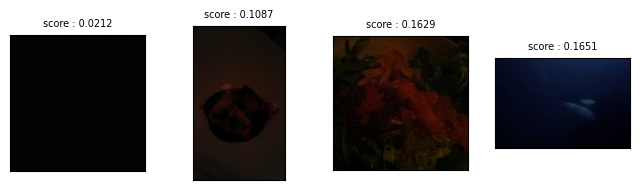


Top 4 examples with blurry issue in the dataset.


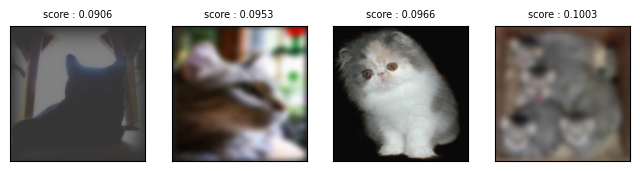

In [15]:
issue_types = {"blurry": {}}

imagelab.find_issues(issue_types)

imagelab.report()

### Save and load

CleanVision also has a save and load functionality that you can use to save the results and load them at a later point in time to see results or run more checks.

For saving, specify `force=True` to overwrite existing files.

In [16]:
save_path = "./results"
imagelab.save(save_path)

Saved Imagelab to folder: ./results
The data path and dataset must be not be changed to maintain consistent state when loading this Imagelab


For loading a saved instance, specify `dataset_path` to help check for any inconsistencies between dataset paths in the previous and current run.

In [17]:
imagelab = Imagelab.load(save_path, dataset_path)

Reading images from /Users/sanjana/cleanlab_home/cleanvision-examples/image_files
Successfully loaded Imagelab


### Check for an issue with a different threshold

You can use the loaded imagelab instance to check for an issue type with a custom hyperparameter. Here is a table of hyperparameters that each issue type supports and their permissible values. 

`threshold`- All images with scores below this threshold will be flagged as an issue.

`hash_size` - This controls how much detail about an image we want to keep for getting perceptual hash. Higher sizes imply more detail.

`hash_type` - Type of perceptual hash to use. Currently `whash` and `phash` are the supported hash types. Check [here](https://github.com/JohannesBuchner/imagehash) for more details on these hash types.

|   | Issue Key        | Hyperparameters                                   |
|---|------------------|---------------------------------------------------|
| 1 | light            | threshold (between 0 and 1)                       |
| 2 | dark             | threshold (between 0 and 1)                       |
| 3 | odd_aspect_ratio | threshold (between 0 and 1)                       |
| 4 | exact_duplicates | N/A                                               |
| 5 | near_duplicates  | hash_size (power of 2), hash_types (whash, phash) |
| 6 | blurry           | threshold (between 0 and 1)                       |
| 7 | grayscale        | threshold (between 0 and 1)                       |
| 8 | low_information  | threshold (between 0 and 1)                       |

Checking for dark images ...
Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | blurry       |           10 |
|  1 | dark         |            8 | 


Top 4 examples with blurry issue in the dataset.


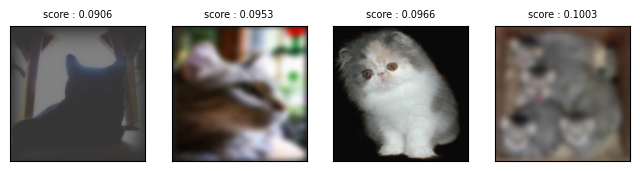


Top 4 examples with dark issue in the dataset.


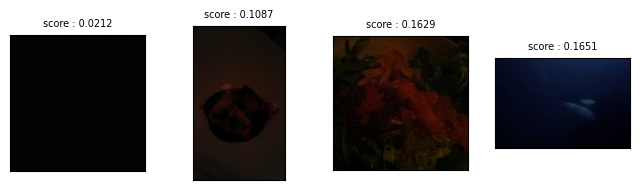

In [18]:
issue_types = {"dark": {"threshold": 0.2}}
imagelab.find_issues(issue_types)

imagelab.report()

Note the number of images with dark issue has reduced from the previous run.

### Run CleanVision for default issue types, but override hyperparameters for one or more issues

Reading images from /Users/sanjana/cleanlab_home/cleanvision-examples/image_files
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 595/595 [00:03<00:00, 194.68it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Checking for odd_aspect_ratio images ...
Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  6 | low_information  |            4 |
|  7 | odd_aspect_ratio |            1 | 


Top 4 examples with low_information issue in the dataset.


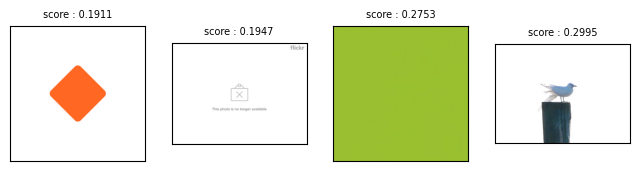

Found 1 example with odd_aspect_ratio issue in the dataset.


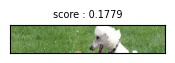

In [19]:
imagelab = Imagelab(data_path=dataset_path)

# Check for all default issue types
imagelab.find_issues()

# Specify an issue with custom hyperparameters
issue_types = {"odd_aspect_ratio": {"threshold": 0.2}}

# Run find issues again with specified issue types
imagelab.find_issues(issue_types)


# Pass list of issue_types to imagelab.report() to report only those issue_types
imagelab.report(["odd_aspect_ratio", "low_information"])

### Customize report

Report can also be customized in various ways to help with the analysis. For example, you can change the verbosity to return more or less information on issues found, default is `verbosity=1`

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | grayscale        |           20 |
|  1 | near_duplicates  |           20 |
|  2 | exact_duplicates |           19 |
|  3 | dark             |           13 |
|  4 | blurry           |           10 |
|  5 | light            |            5 |
|  6 | low_information  |            4 |
|  7 | odd_aspect_ratio |            1 | 


Top 8 examples with grayscale issue in the dataset.


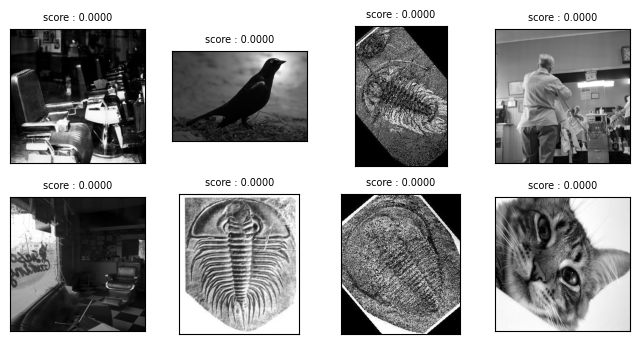


Top 8 sets of images with near_duplicates issue
Set: 0


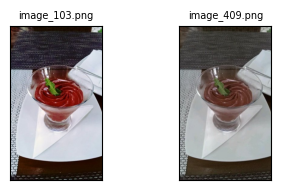

Set: 1


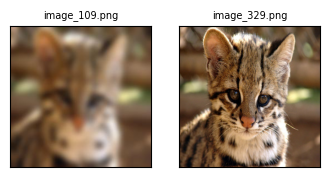

Set: 2


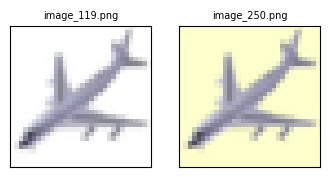

Set: 3


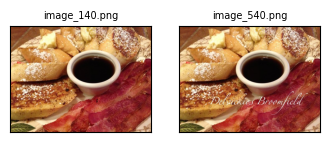

Set: 4


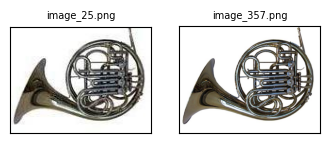

Set: 5


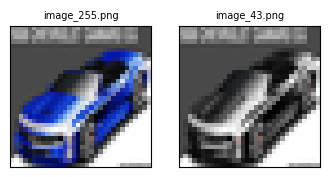

Set: 6


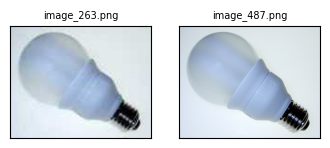

Set: 7


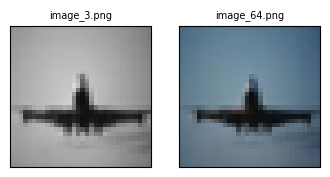


Top 8 sets of images with exact_duplicates issue
Set: 0


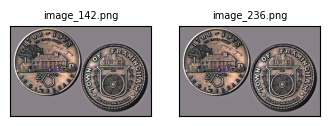

Set: 1


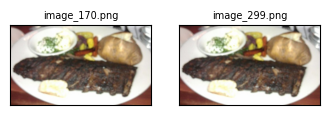

Set: 2


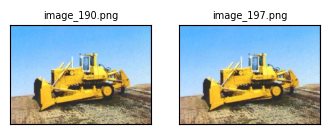

Set: 3


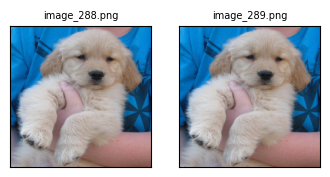

Set: 4


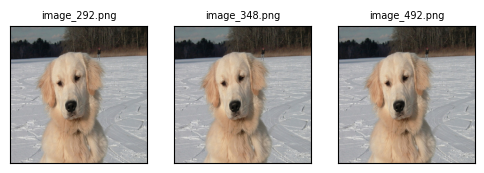

Set: 5


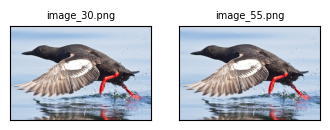

Set: 6


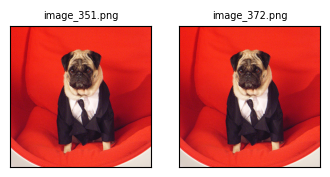

Set: 7


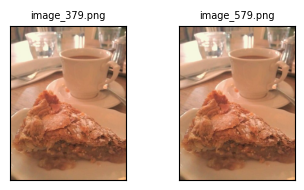


Top 8 examples with dark issue in the dataset.


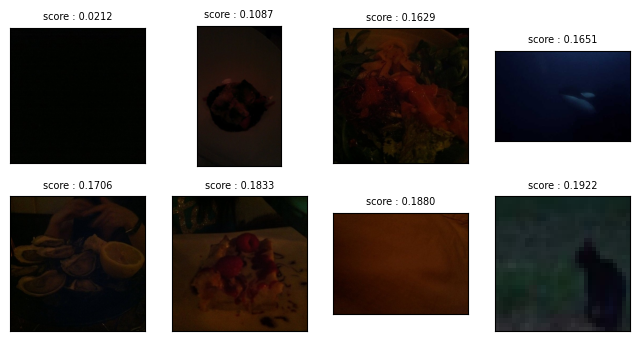


Top 8 examples with blurry issue in the dataset.


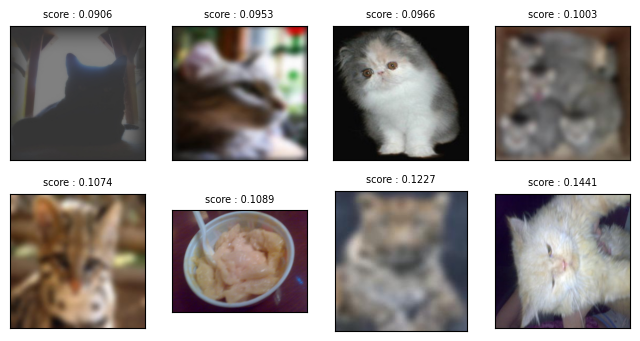

Found 5 examples with light issue in the dataset.


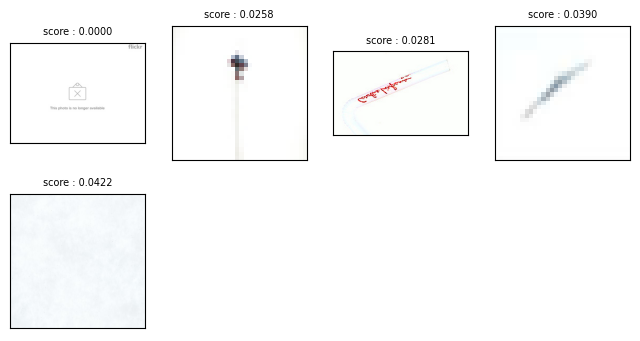

Found 4 examples with low_information issue in the dataset.


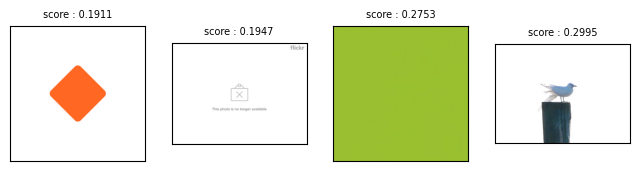

Found 1 example with odd_aspect_ratio issue in the dataset.


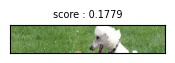

In [20]:
# Change verbosity
imagelab.report(verbosity=2)

You may want to exclude issues from your report which are prevalent in say more than 50% of the dataset and are not real issues but just how the dataset is, for example dark images in an astronomy dataset may not be an issue. You can use the `max_prevalence` parameter in report to exclude such issues. In this example all issues present in more than 3% of the dataset are excluded.

Removing grayscale from potential issues in the dataset as it exceeds max_prevalence=0.03 
Removing near_duplicates from potential issues in the dataset as it exceeds max_prevalence=0.03 
Removing exact_duplicates from potential issues in the dataset as it exceeds max_prevalence=0.03 
Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  3 | dark             |           13 |
|  4 | blurry           |           10 |
|  5 | light            |            5 |
|  6 | low_information  |            4 |
|  7 | odd_aspect_ratio |            1 | 


Top 4 examples with dark issue in the dataset.


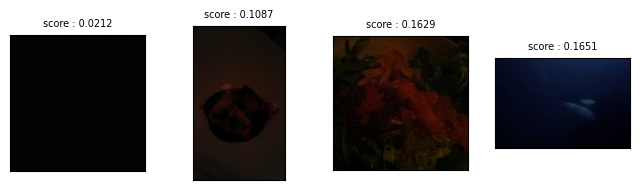


Top 4 examples with blurry issue in the dataset.


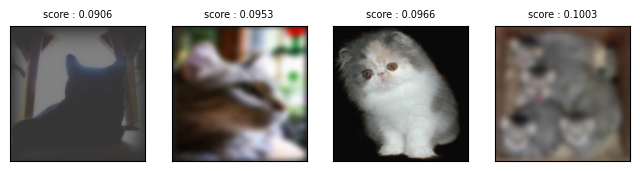


Top 4 examples with light issue in the dataset.


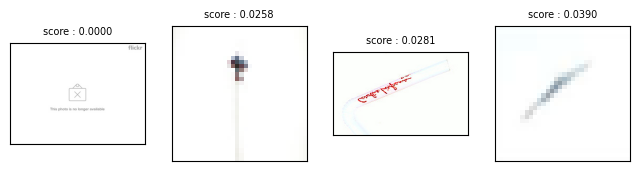


Top 4 examples with low_information issue in the dataset.


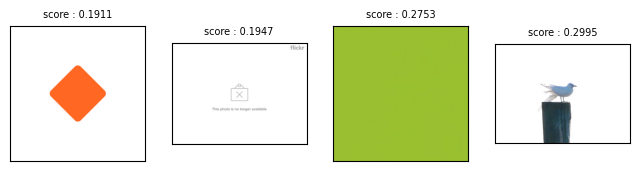

Found 1 example with odd_aspect_ratio issue in the dataset.


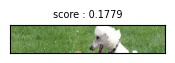

In [21]:
imagelab.report(max_prevalence=0.03)

### Visualize specific issues

Imagelab provides `imagelab.visualize` that you can use to see examples of specific issues in your dataset.

`num_images` and `cell_size` are optional arguments, that you can use to control number of examples of each issue type and size of each image in the grid respectively.


Top 8 examples with grayscale issue in the dataset.


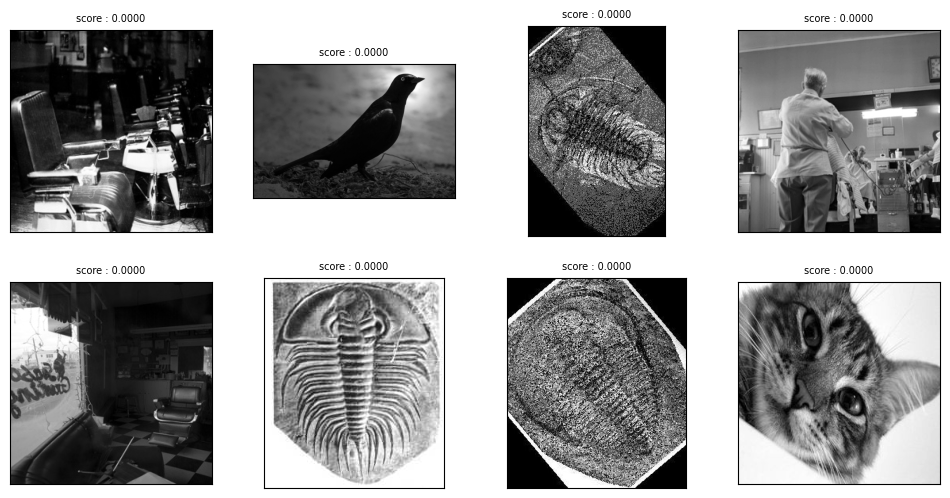

In [22]:
issue_types = ["grayscale"]
imagelab.visualize(issue_types=issue_types, num_images=8, cell_size=(3, 3))

## Advanced: Create your own issue type

You can also create a custom issue type by extending the base class `IssueManager`. CleanVision can then detect your custom issue along with other pre-defined issues in any image dataset! Here's an example of a custom issue manager, which can also be found in the [examples/](https://github.com/cleanlab/cleanvision/blob/main/examples/custom_issue_manager.py) folder of the source code.

In [23]:
from typing import Any, Dict, List, Optional

import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

from cleanvision.issue_managers import register_issue_manager
from cleanvision.utils.base_issue_manager import IssueManager
from cleanvision.utils.utils import get_is_issue_colname, get_score_colname

ISSUE_NAME = "custom"


@register_issue_manager(ISSUE_NAME)
class CustomIssueManager(IssueManager):
    """
    Example class showing how you can self-define a custom type of issue that
    CleanVision can simultaneously check your data for alongside its built-in issue types.
    """

    issue_name: str = ISSUE_NAME
    visualization: str = "individual_images"

    def __init__(self) -> None:
        super().__init__()
        self.params = self.get_default_params()

    def get_default_params(self) -> Dict[str, Any]:
        return {"threshold": 0.4}

    def update_params(self, params: Dict[str, Any]) -> None:
        self.params = self.get_default_params()
        non_none_params = {k: v for k, v in params.items() if v is not None}
        self.params = {**self.params, **non_none_params}

    @staticmethod
    def calculate_mean_pixel_value(image: Image.Image) -> float:
        gray_image = image.convert("L")
        return np.mean(np.array(gray_image))

    def get_scores(self, raw_scores: "np.ndarray[Any, Any]") -> "np.ndarray[Any, Any]":
        scores = np.array(raw_scores)
        return scores / 255.0

    def mark_issue(
        self, scores: "np.ndarray[Any, Any]", threshold: float
    ) -> "np.ndarray[Any, Any]":
        return scores < threshold

    def update_summary(self, summary_dict: Dict[str, Any]) -> None:
        self.summary = pd.DataFrame({"issue_type": [self.issue_name]})
        for column_name, value in summary_dict.items():
            self.summary[column_name] = [value]

    def find_issues(
        self,
        *,
        params: Optional[Dict[str, Any]] = None,
        filepaths: Optional[List[str]] = None,
        imagelab_info: Optional[Dict[str, Any]] = None,
        **kwargs: Any,
    ) -> None:
        super().find_issues(**kwargs)
        assert params is not None
        assert imagelab_info is not None
        assert filepaths is not None

        self.update_params(params)

        raw_scores = []
        for path in tqdm(filepaths):
            image = Image.open(path)
            raw_scores.append(self.calculate_mean_pixel_value(image))

        self.issues = pd.DataFrame(index=filepaths)
        scores = self.get_scores(raw_scores)
        self.issues[get_score_colname(self.issue_name)] = scores
        self.issues[get_is_issue_colname(self.issue_name)] = self.mark_issue(
            scores, self.params["threshold"]
        )
        self.info[self.issue_name] = {"PixelValue": raw_scores}
        summary_dict = self._compute_summary(
            self.issues[get_is_issue_colname(self.issue_name)]
        )

        self.update_summary(summary_dict)

### Run CleanVision with a custom issue

In [24]:
imagelab = Imagelab(data_path=dataset_path)

issue_name = CustomIssueManager.issue_name


# To ensure your issue manager is registered, check list of possible issue types
# issue_name should be present in this list
imagelab.list_possible_issue_types()

Reading images from /Users/sanjana/cleanlab_home/cleanvision-examples/image_files
All possible issues checked by Imagelab:

light
custom
exact_duplicates
low_information
odd_aspect_ratio
image_property
duplicate
near_duplicates
blurry
grayscale
dark




Checking for custom images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 595/595 [00:03<00:00, 193.39it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | custom       |          204 | 


Top 4 examples with custom issue in the dataset.


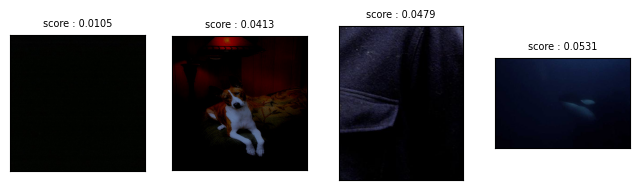

In [25]:
issue_types = {issue_name: {}}
imagelab.find_issues(issue_types)
imagelab.report()